## Лабораторная работа №4: Ансамбли и полносвязные нейронные сети

Усиленный подход с использованием SMOTE и сравнение 5 моделей по AUC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

In [3]:
# Загрузка и предобработка данных
raw_df = pd.read_csv("german.csv", sep=";")
X = raw_df.drop("Creditability", axis=1)
y = raw_df["Creditability"]

In [4]:
# Деление на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

C:\Users\alper\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [6]:
# Определение моделей
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=300, learning_rate=1.0, random_state=42),
    "Voting Classifier": VotingClassifier(estimators=[
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("gb", GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ("ada", AdaBoostClassifier(n_estimators=300, learning_rate=1.0, random_state=42))
    ], voting='soft'),
    "MLPClassifier": MLPClassifier(
        hidden_layer_sizes=(512, 256, 128),
        activation='relu',
        learning_rate_init=0.002,
        alpha=1e-5,
        solver='adam',
        max_iter=2000,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=42
    )
}

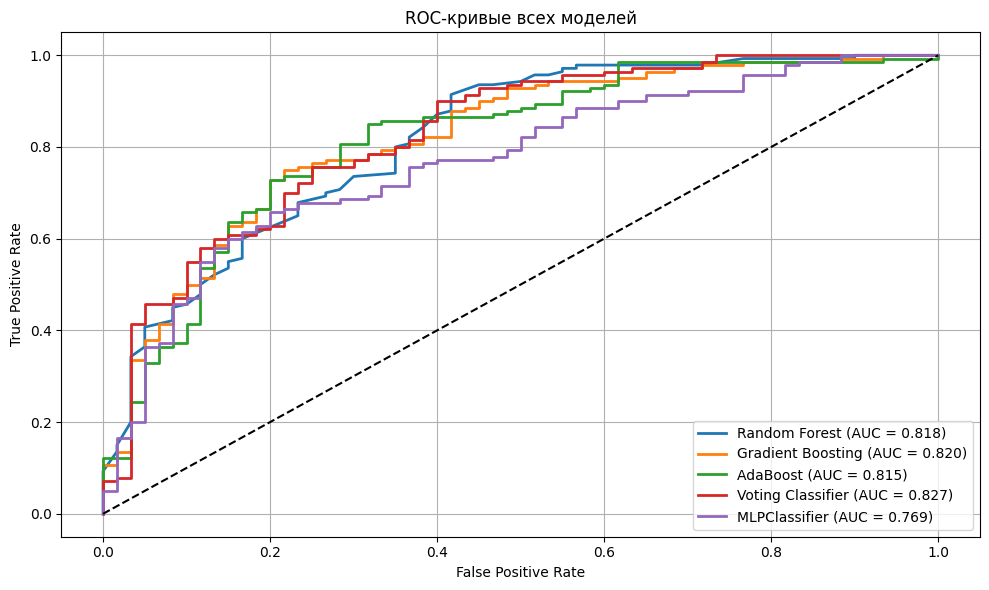

In [7]:
# Построение ROC-кривых
plt.figure(figsize=(10, 6))
auc_scores = {}
for name, model in models.items():
    if name == "MLPClassifier":
        model.fit(X_train_resampled, y_train_resampled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    score = roc_auc_score(y_test, y_proba)
    auc_scores[name] = score
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {score:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые всех моделей")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

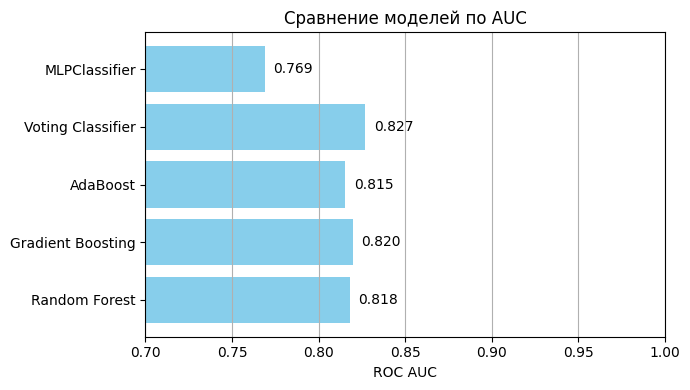

In [8]:
# Сравнение моделей по AUC (Bar-график)
plt.figure(figsize=(7, 4))
plt.barh(list(auc_scores.keys()), list(auc_scores.values()), color='skyblue')
plt.xlabel("ROC AUC")
plt.title("Сравнение моделей по AUC")
for i, (model, score) in enumerate(auc_scores.items()):
    plt.text(score + 0.005, i, f"{score:.3f}", va='center')
plt.xlim(0.7, 1.0)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [9]:
# Итоговые значения AUC
print("\nИтоговые значения ROC AUC по всем моделям:")
for model, score in auc_scores.items():
    print(f"{model}: {score:.4f}")


Итоговые значения ROC AUC по всем моделям:
Random Forest: 0.8180
Gradient Boosting: 0.8198
AdaBoost: 0.8155
Voting Classifier: 0.8271
MLPClassifier: 0.7690


In [10]:
# Вывод
# В данной лабораторной работе была реализована классификация на основе пяти моделей.
# Включая ансамбли и полносвязную нейросеть, применено масштабирование и балансировка данных (SMOTE).
# Модель с наибольшим AUC может быть рекомендована к дальнейшему использованию.